In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_dedupe


path = '/Users/jonzimmerman/Desktop/Data Projects/Setlists/data/setlists/'
setlists_df = pd.read_csv(path + 'full_setlist_df.csv')
setlists_df.shape

(35608, 24)

In [2]:
setlists_df.head(2)

,RecordID,Date,VenueName,TourName,Info,City,State,Country,Latitude,Longitude,...,song_num,ArtistName,album,cleaned_lyrics,happy,angry,surprise,sad,fear,compound
0,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,0,Dredg,Catch Without Arms,but ill move those clouds away letting the sun...,0.08,0.12,0.12,0.32,0.36,0.9974
1,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,1,Dredg,Catch Without Arms,bring back those good old days nothing feels r...,0.28,0.11,0.22,0.22,0.17,0.0772


In [3]:
dredg = setlists_df[setlists_df['ArtistName']=='Dredg']
dredg.shape

(4070, 24)

In [4]:
dredg.head(3)

,RecordID,Date,VenueName,TourName,Info,City,State,Country,Latitude,Longitude,...,song_num,ArtistName,album,cleaned_lyrics,happy,angry,surprise,sad,fear,compound
0,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,0,Dredg,Catch Without Arms,but ill move those clouds away letting the sun...,0.08,0.12,0.12,0.32,0.36,0.9974
1,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,1,Dredg,Catch Without Arms,bring back those good old days nothing feels r...,0.28,0.11,0.22,0.22,0.17,0.0772
2,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,2,Dredg,Catch Without Arms,im not that beam of light here to save your li...,0.13,0.03,0.03,0.13,0.69,0.9825


<AxesSubplot: >

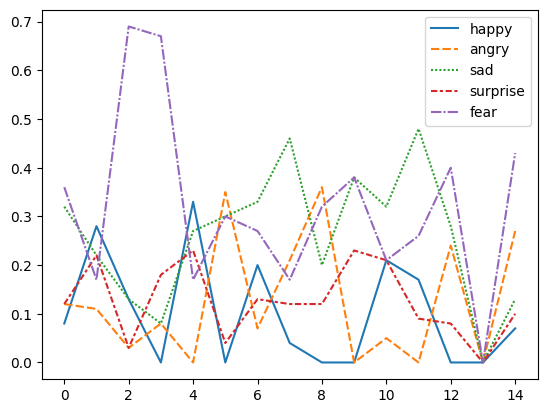

In [5]:
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

last_concert = dredg[dredg['RecordID']=='63c30e63']
sns.lineplot(data=last_concert[['happy', 'angry', 'sad', 'surprise', 'fear']])

In [6]:
dredg['TourName'].unique()[1]

'Chuckles and Mr. Squeezy'

<AxesSubplot: >

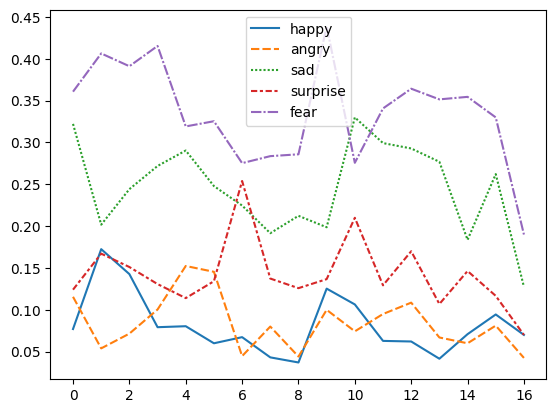

In [7]:
ppd = dredg[dredg['TourName']==dredg['TourName'].unique()[5]]
ppd = ppd.groupby("song_num")[['happy','angry','sad','surprise','fear']].mean().reset_index()
ppd = ppd[0:17]
sns.lineplot(data=ppd[['happy', 'angry', 'sad', 'surprise', 'fear']])


In [8]:
def plot_average_emotions_by_band(artist_name, num_songs):
    artist_filtered = setlists_df[setlists_df['ArtistName']==artist_name]
    artist = artist_filtered.groupby("song_num")[['happy','angry','sad','surprise','fear']].mean().reset_index()
    artist = artist[0:num_songs+1]
    sns.lineplot(data=artist[['happy', 'angry', 'sad', 'surprise', 'fear']])
    plt.legend(loc='upper right')

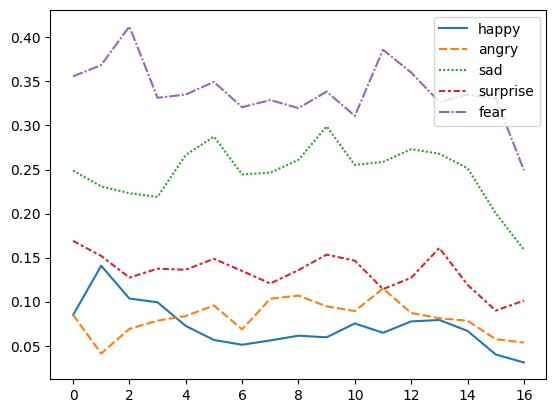

In [9]:
plot_average_emotions_by_band('Dredg',16)

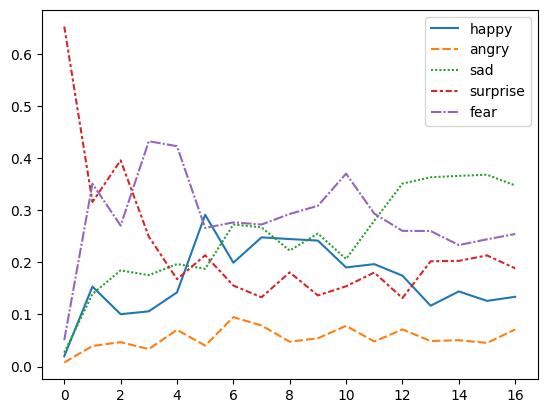

In [10]:
plot_average_emotions_by_band('Gorillaz',16)

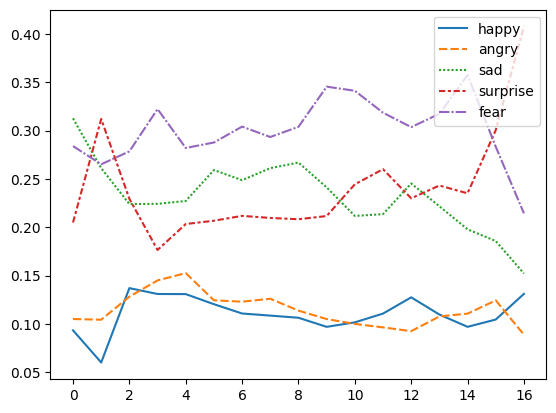

In [11]:
plot_average_emotions_by_band('TV on the Radio',16)

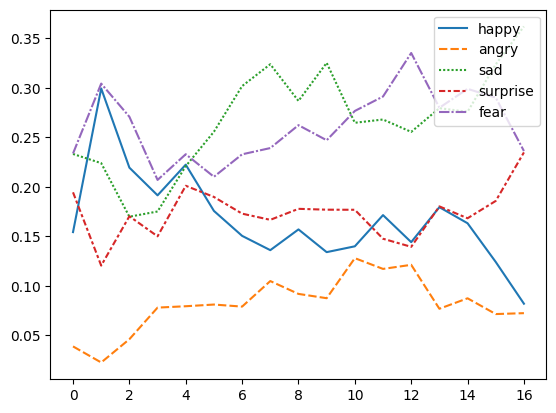

In [12]:
plot_average_emotions_by_band('Tame Impala',16)

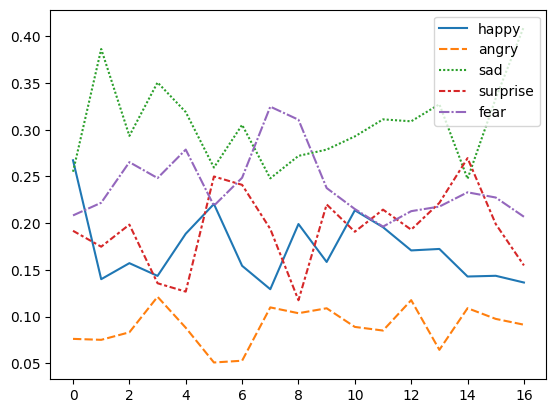

In [13]:
plot_average_emotions_by_band('Taylor Swift',16)

In [14]:
def plot_one_emotion_for_each_artist(emotion, num_songs):
    artist = setlists_df[['ArtistName','song_num',emotion]]
    artist = artist.groupby(['ArtistName', 'song_num']).agg({emotion: 'mean'}).reset_index()
    artist = artist[artist['song_num']<=num_songs+1]
    sns.lineplot(x = 'song_num', y = emotion, data = artist ,hue= 'ArtistName')
    plt.legend(loc='upper right')

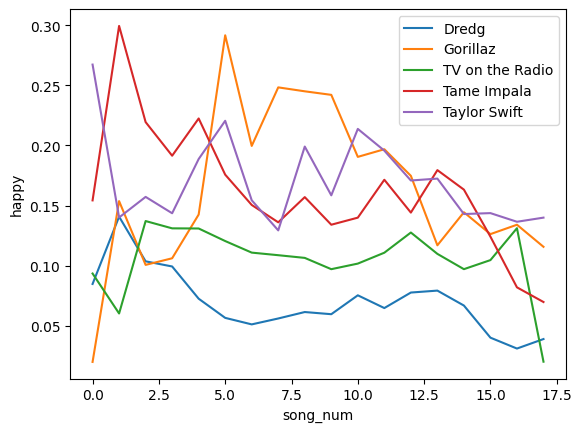

In [15]:
plot_one_emotion_for_each_artist('happy',16)

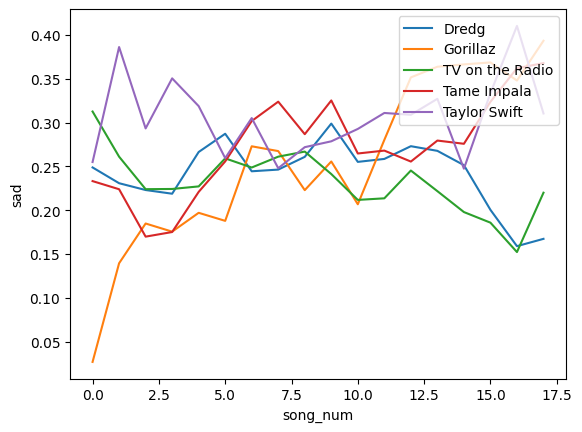

In [16]:
plot_one_emotion_for_each_artist('sad',16)

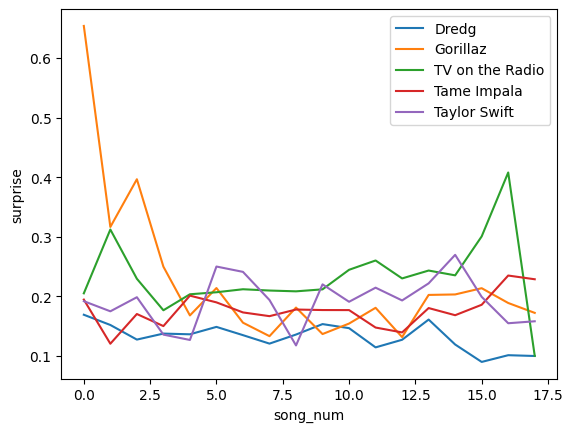

In [17]:
plot_one_emotion_for_each_artist('surprise',16)

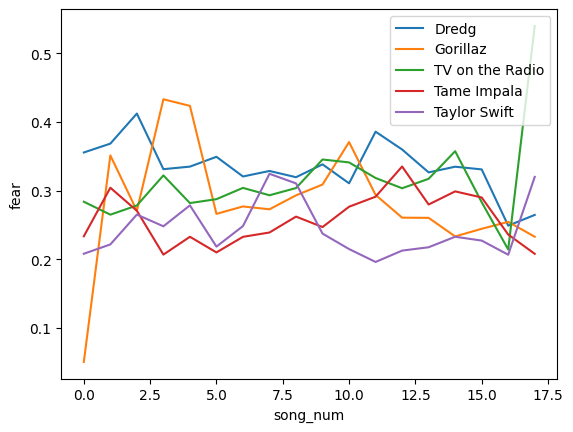

In [18]:
plot_one_emotion_for_each_artist('fear',16)

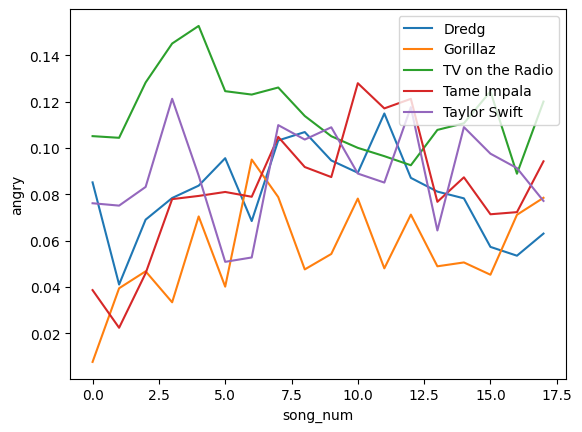

In [19]:
plot_one_emotion_for_each_artist('angry',16)

#### Encores

In [20]:
encores = setlists_df[setlists_df['Encore']==1]
encores.shape

(2507, 24)

In [22]:
encore_songs = []

for i in encores['ArtistName'].unique():
    filtered = encores[encores['ArtistName']==i]
    filtered = filtered['SongName'].value_counts()
    filtered = pd.DataFrame(filtered).reset_index()
    filtered = filtered[0:5]
    filtered['ArtistName'] = i
    encore_songs.append(filtered)
    
result = pd.concat(encore_songs, ignore_index=True)
result

,SongName,count,ArtistName
0,Cartoon Showroom,6,Dredg
1,Movement V: 90 Hour Sleep,4,Dredg
2,Lightswitch,3,Dredg
3,Down to the Cellar,3,Dredg
4,Pariah,2,Dredg
5,Clint Eastwood,204,Gorillaz
6,Don't Get Lost in Heaven,111,Gorillaz
7,Demon Days,111,Gorillaz
8,Feel Good Inc.,109,Gorillaz
9,Stylo,75,Gorillaz


#### Average emotion (overall, by album, by tour)

In [23]:
setlists_df.head(2)

,RecordID,Date,VenueName,TourName,Info,City,State,Country,Latitude,Longitude,...,song_num,ArtistName,album,cleaned_lyrics,happy,angry,surprise,sad,fear,compound
0,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,0,Dredg,Catch Without Arms,but ill move those clouds away letting the sun...,0.08,0.12,0.12,0.32,0.36,0.9974
1,63c30e63,5/3/14,Gruenspan,NaN,Second show of the day,Hamburg,Hamburg,Germany,53.55,10.0,...,1,Dredg,Catch Without Arms,bring back those good old days nothing feels r...,0.28,0.11,0.22,0.22,0.17,0.0772


In [24]:
artist = setlists_df[setlists_df['ArtistName']=='Gorillaz']
overall_mean = artist[['happy','angry','sad','surprise','fear','compound']].mean().reset_index()
overall_mean.rename(
    columns={
        overall_mean.columns[0]: "emotion_name",
        overall_mean.columns[1]: "average_emotion"

    }, inplace = True)


album_means = artist.groupby("album")[['happy','angry','sad','surprise','fear','compound']].mean().reset_index()
tour_means = artist.groupby("TourName")[['happy','angry','sad','surprise','fear','compound']].mean().reset_index()
album_means

,album,happy,angry,sad,surprise,fear,compound
0,Cracker Island,0.073482,0.009464,0.218214,0.363036,0.338393,0.018998
1,Demon Days,0.153736,0.043798,0.283681,0.282478,0.238656,0.148570
2,Gorillaz,0.123805,0.026930,0.165074,0.440597,0.240956,-0.064714
3,Humanz,0.098335,0.061334,0.480882,0.075612,0.275612,0.461971
4,Plastic Beach,0.245968,0.116972,0.205220,0.148043,0.241796,0.414805
5,The Fall,0.162857,0.054286,0.148571,0.478571,0.162857,-0.476929
6,The Now Now,0.073586,0.021414,0.318000,0.203379,0.380690,0.452834


In [25]:
artist = setlists_df[setlists_df['ArtistName']=='Dredg']
artist = artist.groupby("song_num")[['happy','angry','sad','surprise','fear']].mean().reset_index()
artist[0:17]

,song_num,happy,angry,sad,surprise,fear
0,0,0.084698,0.085160,0.248861,0.169039,0.355730
1,1,0.140741,0.041111,0.230842,0.151852,0.368620
2,2,0.103535,0.069091,0.223064,0.127340,0.412391
3,3,0.099259,0.078418,0.218855,0.137407,0.331414
4,4,0.072432,0.083750,0.266486,0.136216,0.335135
5,5,0.056477,0.095587,0.287331,0.148648,0.349431
6,6,0.051051,0.068482,0.244475,0.134786,0.320778
7,7,0.055965,0.103246,0.246404,0.120570,0.328816
8,8,0.061333,0.106857,0.260952,0.135810,0.319714
9,9,0.059529,0.094607,0.298953,0.153351,0.338429


In [26]:
artist = setlists_df[setlists_df['ArtistName']=='Dredg']
artist = artist.groupby(["TourName","song_num"])[['happy','angry','sad','surprise','fear','compound']].mean().reset_index()
artist = artist[artist['song_num']<=17]
artist

,TourName,song_num,happy,angry,sad,surprise,fear,compound
0,Catch Without Arms,0,0.077037,0.115556,0.322222,0.124074,0.360741,0.938759
1,Catch Without Arms,1,0.172500,0.053929,0.201786,0.167143,0.406429,0.592857
2,Catch Without Arms,2,0.142692,0.071538,0.244231,0.151154,0.391154,0.617650
3,Catch Without Arms,3,0.079231,0.100385,0.271923,0.130769,0.415385,0.155200
4,Catch Without Arms,4,0.080400,0.152400,0.290400,0.114000,0.319200,-0.215244
...,...,...,...,...,...,...,...,...
113,"The Pariah, the Parrot, the Delusion",13,0.126207,0.092414,0.237931,0.167586,0.270690,0.148014
114,"The Pariah, the Parrot, the Delusion",14,0.105313,0.150313,0.253437,0.123438,0.366250,-0.066603
115,"The Pariah, the Parrot, the Delusion",15,0.105000,0.083077,0.236154,0.141923,0.317308,0.109773
116,"The Pariah, the Parrot, the Delusion",16,0.037727,0.066364,0.176818,0.099545,0.302273,0.417609


#### Rank artist's songs by emotion

In [113]:
rank = setlists_df[setlists_df['ArtistName']=='Dredg']
#rank = rank[rank['happy']>0]
rank = rank.drop_duplicates(subset="SongName")
rank = rank[['SongName','happy','fear','angry','sad','surprise']]
rank = rank.sort_values(by = 'happy', ascending=False)
rank.rename(columns={rank.columns[0]: "name"}, inplace = True)
rank_dedupped = pandas_dedupe.dedupe_dataframe(
    rank, 
    field_properties = ['name'], 
    canonicalize=True
    )

rank_dedupped = rank_dedupped.drop_duplicates(subset="canonical_name")
rank_dedupped = rank_dedupped[0:100]
rank_dedupped

Importing data ...
Reading from dedupe_dataframe_learned_settings
Clustering...
# duplicate sets 114


,name,happy,fear,angry,sad,surprise,cluster id,confidence,canonical_name,canonical_happy,canonical_fear,canonical_angry,canonical_sad,canonical_surprise
362,upon returning,0.41,0.09,0.0,0.5,0.0,73,1.0,upon returning,0.41,0.09,0.0,0.5,0.0
4,zebraskin,0.33,0.17,0.0,0.27,0.23,4,1.0,zebraskin,0.33,0.17,0.0,0.27,0.23
3291,sorry but it's over,0.31,0.31,0.0,0.38,0.0,58,1.0,sorry but it's over,0.31,0.31,0.0,0.38,0.0
17,sanzen,0.31,0.23,0.08,0.31,0.08,17,1.0,sanzen,0.31,0.23,0.08,0.31,0.08
3848,the warbler,0.3,0.3,0.0,0.4,0.0,64,1.0,the warbler,0.3,0.3,0.0,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33779,messing around,None,None,None,None,None,109,1.0,messing around,,,,,
33780,hello,None,None,None,None,None,110,1.0,hello,,,,,
33781,drum outro,None,None,None,None,None,111,1.0,drum outro,,,,,
33782,the ornament (instrumental),None,None,None,None,None,112,1.0,the ornament (instrumental),,,,,


#### Let's attempt to find the ideal order of songs

In [142]:
artist = setlists_df[setlists_df['ArtistName']=='Dredg']

# Step 1: Group by the column you are interested in
grouped = artist.groupby('RecordID')

# Step 2: Count the number of rows in each group
counts = grouped.size()

# Step 3: Compute the average of these counts
average_rows_per_group = counts.mean()
upper_bound = round(average_rows_per_group)
upper_bound

13

In [143]:
#1.) Average emotion by position
artist = setlists_df[setlists_df['ArtistName']=='Dredg']
artist = artist.groupby("song_num")[['happy','angry','sad','surprise','fear']].mean().reset_index()
artist['song_num'] = artist['song_num'] + 1
avg_setlist = artist[0:upper_bound]
avg_setlist

,song_num,happy,angry,sad,surprise,fear
0,1,0.084698,0.085160,0.248861,0.169039,0.355730
1,2,0.140741,0.041111,0.230842,0.151852,0.368620
2,3,0.103535,0.069091,0.223064,0.127340,0.412391
3,4,0.099259,0.078418,0.218855,0.137407,0.331414
4,5,0.072432,0.083750,0.266486,0.136216,0.335135
5,6,0.056477,0.095587,0.287331,0.148648,0.349431
6,7,0.051051,0.068482,0.244475,0.134786,0.320778
7,8,0.055965,0.103246,0.246404,0.120570,0.328816
8,9,0.061333,0.106857,0.260952,0.135810,0.319714
9,10,0.059529,0.094607,0.298953,0.153351,0.338429


In [114]:
rank_dedupped.shape

(100, 14)

In [115]:
rank_dedupped.columns

Index(['name', 'happy', 'fear', 'angry', 'sad', 'surprise', 'cluster id',
       'confidence', 'canonical_name', 'canonical_happy', 'canonical_fear',
       'canonical_angry', 'canonical_sad', 'canonical_surprise'],
      dtype='object')

In [137]:
import pandas as pd
import numpy as np

# Master list to compare
df1 = rank_dedupped[['canonical_name', 'canonical_happy','canonical_fear','canonical_angry','canonical_sad','canonical_surprise']]

numeric_columns = df1.loc[:, df1.columns != 'canonical_name']
df1['canonical_happy'] = df1['canonical_happy'].apply(pd.to_numeric, errors='coerce')
df1['canonical_fear'] = df1['canonical_fear'].apply(pd.to_numeric, errors='coerce')
df1['canonical_angry'] = df1['canonical_angry'].apply(pd.to_numeric, errors='coerce')
df1['canonical_sad'] = df1['canonical_sad'].apply(pd.to_numeric, errors='coerce')
df1['canonical_surprise'] = df1['canonical_surprise'].apply(pd.to_numeric, errors='coerce')

# Look at one position at a time
df2 = avg_setlist.head(1)

# Extract numeric values from df2
df2_values = df2.iloc[0, 1:].values

# Define the tolerance
tolerance = 0.05

# Calculate absolute differences
diff = (df1[['canonical_happy', 'canonical_fear', 'canonical_angry', 'canonical_sad', 'canonical_surprise']] - df2_values).abs()

# Count how many columns meet the condition
num_within_tolerance = (diff <= tolerance).sum(axis=1)

# Filter df1 based on the condition (at least 3 out of 5 columns within tolerance)
mask = (num_within_tolerance >= 3)
matching_rows = df1[mask]

matching_rows

,canonical_name,canonical_happy,canonical_fear,canonical_angry,canonical_sad,canonical_surprise
2170,where i'll end up,0.10,0.20,0.10,0.20,0.4
14,cartoon showroom,0.07,0.43,0.27,0.13,0.1
